In [1]:
# Import the libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Donwload the data
data = yf.download('TCSG.ME', '2019-06-06')
df = data[['Close']].copy()
df.reset_index(level=0, inplace=True)
df.columns = ['Date', 'Close']
df

[*********************100%***********************]  1 of 1 completed


,Date,Close
0,2019-10-29,1219.800049
1,2019-10-30,1217.000000
2,2019-10-31,1216.000000
3,2019-11-01,1214.000000
4,2019-11-05,1198.000000
...,...,...
375,2021-04-30,4364.000000
376,2021-05-04,4427.799805
377,2021-05-05,4458.600098
378,2021-05-06,4507.399902


In [3]:
# Calculate the three moving averages
# Calculate the short/fast exponential moving average
short_ema = df.Close.ewm(span=5, adjust=False).mean()
# Calculate the middle/medium exponential moving average
middle_ema = df.Close.ewm(span=21, adjust=False).mean()
# Calculate the long/slow exponential moving average
long_ema = df.Close.ewm(span=63, adjust=False).mean()

df['Short EMA'] = short_ema
df['Middle EMA'] = middle_ema
df['Long EMA'] = long_ema
df

,Date,Close,Short EMA,Middle EMA,Long EMA
0,2019-10-29,1219.800049,1219.800049,1219.800049,1219.800049
1,2019-10-30,1217.000000,1218.866699,1219.545499,1219.712547
2,2019-10-31,1216.000000,1217.911133,1219.223181,1219.596530
3,2019-11-01,1214.000000,1216.607422,1218.748346,1219.421639
4,2019-11-05,1198.000000,1210.404948,1216.862133,1218.752212
...,...,...,...,...,...
375,2021-04-30,4364.000000,4378.463544,4414.925035,4055.191827
376,2021-05-04,4427.799805,4394.908964,4416.095468,4066.835826
377,2021-05-05,4458.600098,4416.139342,4419.959526,4079.078460
378,2021-05-06,4507.399902,4446.559529,4427.908651,4092.463505


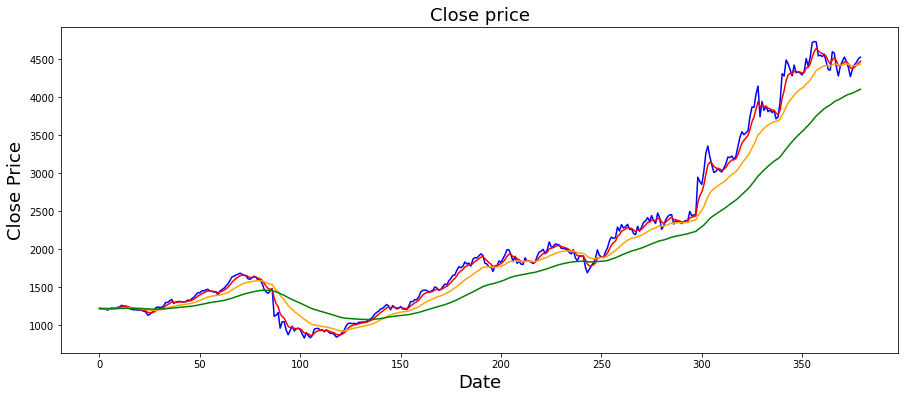

In [4]:
# Vusialize the closing price and the exponential moving averages
plt.figure(figsize=(15, 6))
plt.title('Close price', fontsize = 18)
plt.plot(df['Close'], label = 'Close price', color = 'blue')
plt.plot(df['Short EMA'], label = 'Short/Fast EMA', color = 'red')
plt.plot(df['Middle EMA'], label = 'Middle/Medium EMA', color = 'orange')
plt.plot(df['Long EMA'], label = 'Long/Slow EMA', color = 'green')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

In [ ]:
# Create the function to buy and sell the stock
def buy_sell(data):
    
    buy = []
    sell = []
    flag_long = False
    flag_short = False
    
    